# Average Differences Bewteen Labels Comparison Notebook

### Objectives

- Compare the difference between average images for each label with respect to each other label

### Inputs

-  Image shape embeddings (outputs/{version}/image_shape.pkl)
- Training Images (inputs/brain_tumour_datas/train)

### Outputs

### Install Requirements

In [1]:
%pip install -r /workspace/Brain_tumour_diagnostic/requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Import Packages

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import joblib
import os
from tensorflow.keras.preprocessing import image


In [3]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
work_dir = os.getcwd()
work_dir

'/workspace/Brain_tumour_diagnostic'

### Set Output Directory

In [4]:
version = 'v1'

In [5]:
my_data_dir = 'inputs/brain_tumour_dataset'
train_path = my_data_dir + '/train'

file_path = f'outputs/{version}'


In [6]:
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(224, 222, 3)

### Load Images

In [7]:
def load_image_as_array(my_data_dir, new_size=(50, 50), n_images_per_label=20):

    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(my_data_dir + '/' + label):
            # n_images_per_label: we set a limit, since it may take too much time
            if counter < n_images_per_label:

                img = image.load_img(
                    my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1,
                                                      new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y


In [8]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

(120, 224, 222, 3) (120,)


### Show Differences Between Average Images

In [9]:
def subset_image_label(X, y, label_to_display):
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df


def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False):
    """
    Checks if the labels exist in the set of unique labels
    Calculates the mean and difference for label1 and label2
    Plots a chart and saves it if save_image=True
    """
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(
            f"Either label {label_1} or label {label_2}, are not in {np.unique(y)} ")
        return

    # calculate mean from label1
    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)

    # calculate mean from label2
    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label, axis=0)

    # calculate difference and plot difference, avg label1 and avg label2
    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1}')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2}')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')
    if save_image:
        plt.savefig(f"{file_path}/avg_diff_{label_1}_{label_2}.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


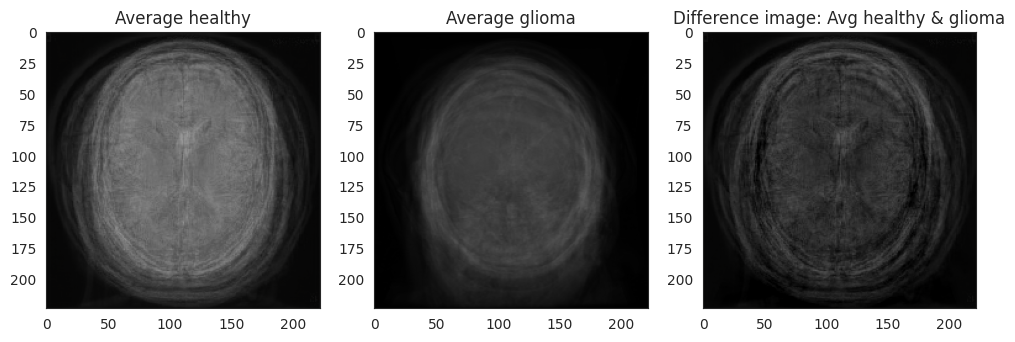

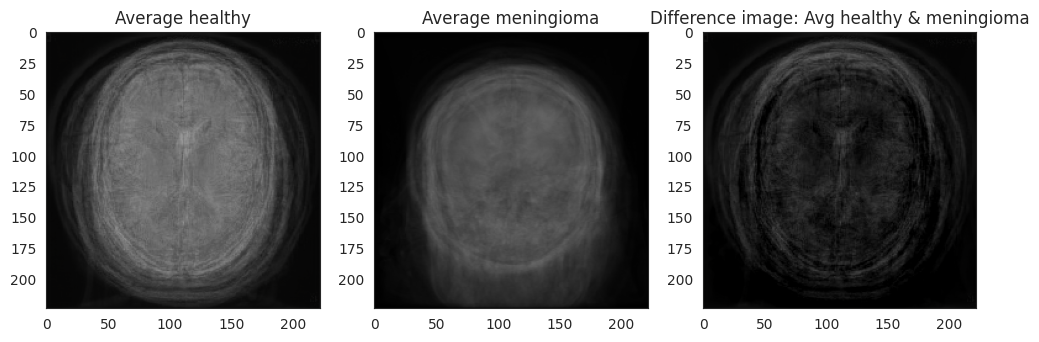

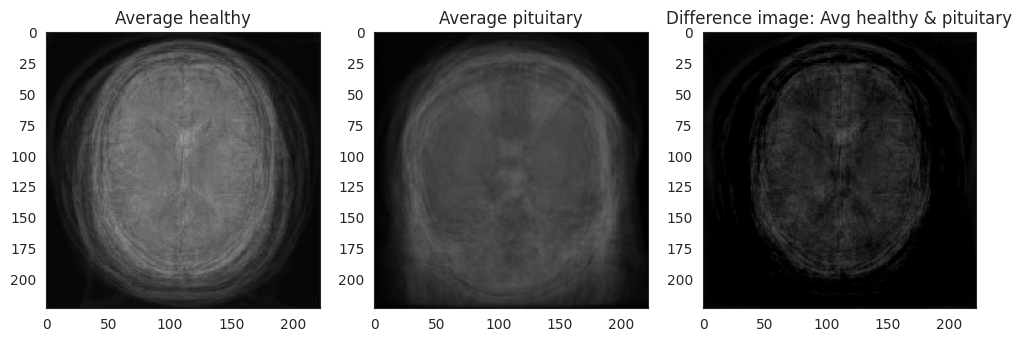

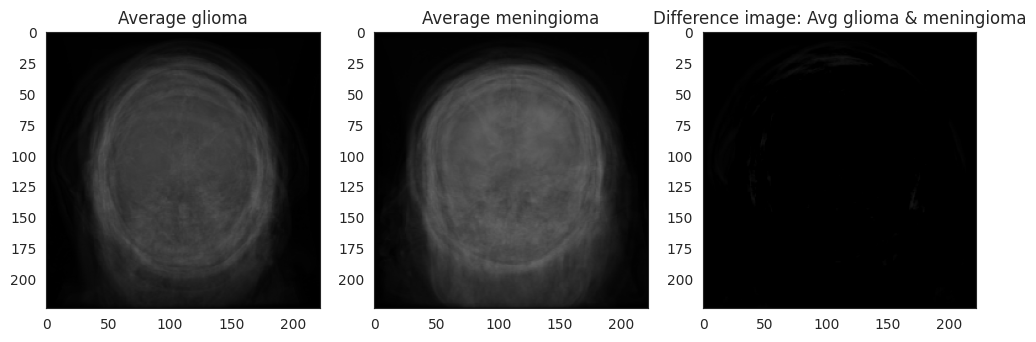

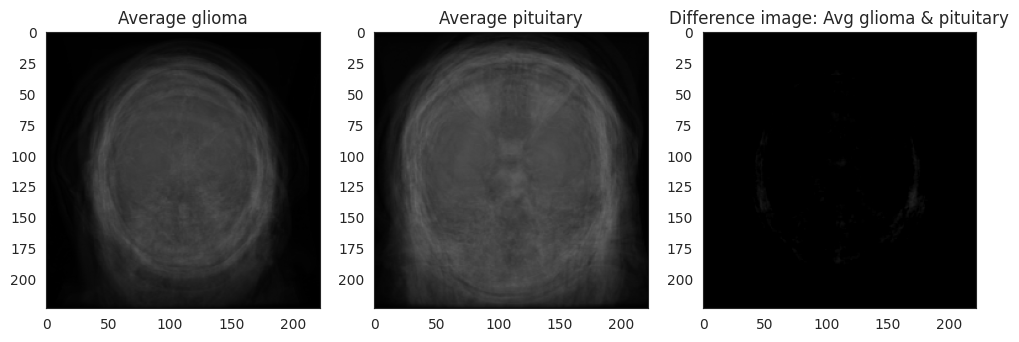

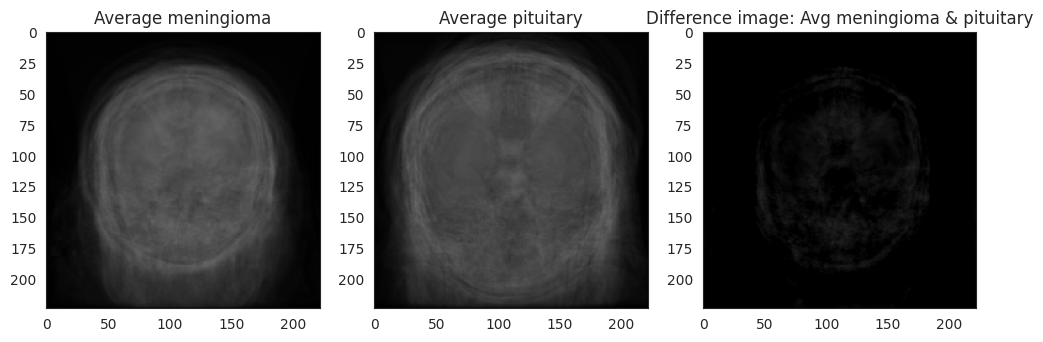

In [10]:
# variable to track index of label_2
current= 0
# variable to track which labels have already been compared as label_1
done = 0

labels= ['healthy', 'glioma','meningioma', 'pituitary']

for label_1 in labels:
    for label_2 in labels:
        if current >= done:
            if label_1 != label_2:
                diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                                        label_1=label_1, label_2=label_2,
                                                        figsize=(12, 10),
                                                        save_image=True
                                                        )
        current += 1
    done += 1
    current = 0